<center><h1>Matplotlib Exercise for Data Science</h1></center>

## Dataset description

*The* dataset has thirteen feature, there are
* Age
* Sex
  * 0: female 
  * 1: male
* cp: Chest Pain
  * 0: Typical Angina
  * 1: Atypical Angina
  * 2: Non-Anginal Pain
  * 3: Asymptomatic
* tresbps: Resting Blood Pressure
* chol: Cholesterol in mg/dl
* fbs: Fasting Blood Sugar
  * 0: Less Than 120mg/ml
  * 1: Greater Than 120mg/ml
* restecg: Resting Electrocardiographic Measurement
  * 0: Normal
  * 1: ST-T Wave Abnormality
  * 2: Left Ventricular Hypertrophy
* thalach: Max Heart Rate Achieved
* exang: Exercise Induced Angina
  * 1: Yes
  * 0: No
* oldpeak: ST depression induced by exercise relative to rest
* slope: Slope of the peak exercise ST segment
  * 0: Upsloping
  * 1: Flat
  * 2: Downsloping
* ca: Number of major vessels colored by fluoroscopy (0-3)
* thal: A blood disorder called 'Thalassemia':
  * 0: Normal
  * 1: Fixed Defect
  * 2: Reversable Defect








In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/data_lab5')

## Correlation between features



In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


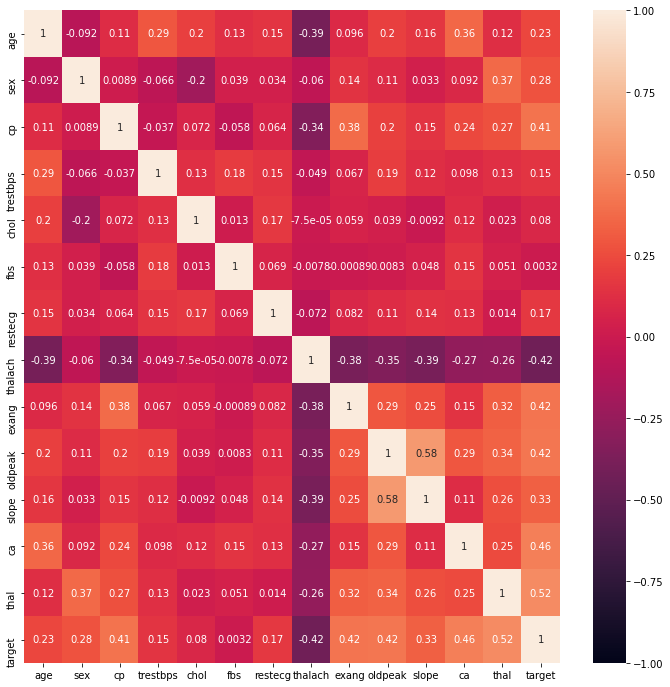

In [9]:

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(data.corr(method='pearson'), vmin=-1, vmax=1, annot=True)

I'm using heatmaps that will represent the correlation values because this is the easiest way to find out which correlation has higher or lower value based on the heatmap color.

From the heatmap, I can now find which attributes correlates the highest (closest to 1 or -1), therefore, the matching attributes with high correlation values are 'slope' and 'oldpeak'

Meanwhile, the ones with lower correlation values means that value closest to 0, which are 'chol' and 'thalach'

---

## Visualization of Blood Disorder

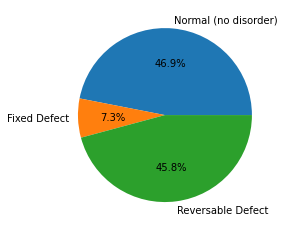

In [ ]:
data_filtered = data[(data['age'] >= 50) & (data['age'] <= 65)]

normal = data_filtered[data_filtered['thal'] == 0].shape[0]
fixed_defect = data_filtered[data_filtered['thal'] == 1].shape[0]
reversable_defect = data_filtered[data_filtered['thal'] == 2].shape[0]

blood_disorder = ('Normal (no disorder)', 'Fixed Defect', 'Reversable Defect',)
value = (normal, fixed_defect, reversable_defect)

plt.pie(
    value,
    labels=blood_disorder,
    autopct='%1.1f%%',
)
plt.show()

I wanted to visualize the percentage of the total of each blood disorder in the dataset **[Normal (no disorder), Fixed Defect, Reversable Defect]** with age group from 50 - 65  

Using this pie chart, I can visualize the biggest portion of the data. The percentage of people with Fixed Defect is 7,3%.

---

## Pattern between resting blood pressure and cholestrol

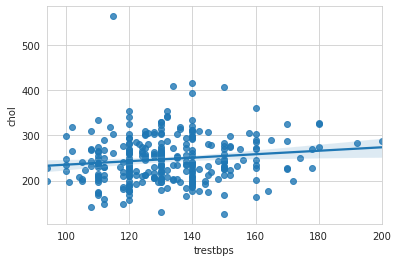

In [ ]:
sns.set_style('whitegrid')
sns.regplot(x = 'trestbps', y ='chol', data = data)

With regression plots, I can see the relation pattern of two attributes; blood pressure and cholestrol, which is shown to be linear relation. Regression plot also shows that there's regression line which is one graphic line that represent the relation between these two attributes, and the furthest dot of data is what I assume outliers.

---

## Age with most heart disease

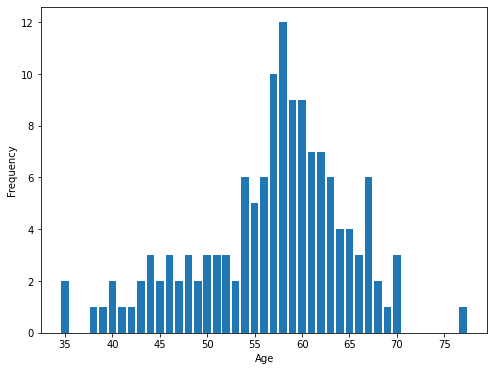

In [13]:
data_with_disease = data[data['target'] == 1]
age_mins = int(data_with_disease.min()['age'])
age_maks = int(data_with_disease.max()['age'])

value = []
labels = []

for age in range(age_mins, age_maks + 1):
    new_data_with_disease = data_with_disease[data_with_disease['age'] == age]
    value.append(new_data_with_disease.shape[0])
    labels.append(age)

plt.figure(figsize=(8, 6))
plt.bar(labels, value)
plt.xticks([age for age in range(age_mins, age_maks + 1) if age % 5 == 0])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age that has the most case of heart disease is 58

---

## Average resting blood pressure over age  

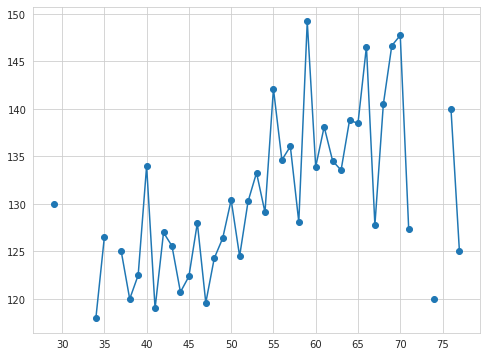

In [ ]:
import math

age_mins = int(data.min()['age'])
age_maks = int(data.max()['age'])

value = []
labels = []

for age in range(age_mins, age_maks + 1):
    new_data = data[data['age'] == age]
    now = new_data['trestbps'].mean()

    value.append(new_data['trestbps'].mean())
    labels.append(age)

plt.figure(figsize=(8, 6))
plt.plot(labels, value, marker='o')
plt.xticks([age for age in range(age_mins, age_maks + 1) if age % 5 == 0])
plt.grid(True)
plt.show()


It can bee seen from the diagram that there are some age points that do not have a point in the diagram, meaning that there's no data with that age point in the dataset. The one that has significant change from the diagram is from the agr 59 to 60, meaning that the blood pressure goes up significantly in this age range.